Using CIFAR10 data for image classification

In [1]:
#Importing important libraries

import pandas as pd
import numpy as np
import tensorflow as tf
from keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,LeakyReLU,BatchNormalization,RandomFlip,RandomRotation,RandomZoom
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt

In [2]:
#defining callbacks to be used for model optimization

rop=ReduceLROnPlateau(monitor='val_loss',patience=3,verbose=1,factor=0.5)
es=EarlyStopping(monitor='val_loss',patience=5,verbose=1)

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
print(x_train[0][0])

[[ 59  62  63]
 [ 43  46  45]
 [ 50  48  43]
 [ 68  54  42]
 [ 98  73  52]
 [119  91  63]
 [139 107  75]
 [145 110  80]
 [149 117  89]
 [149 120  93]
 [131 103  77]
 [125  99  76]
 [142 115  91]
 [144 112  86]
 [137 105  79]
 [129  97  71]
 [137 106  79]
 [134 106  76]
 [124  97  64]
 [139 113  78]
 [139 112  75]
 [133 105  69]
 [136 105  74]
 [139 108  77]
 [152 120  89]
 [163 131 100]
 [168 136 108]
 [159 129 102]
 [158 130 104]
 [158 132 108]
 [152 125 102]
 [148 124 103]]


In [ ]:
#Normalization
x_train=x_train/255
x_test=x_test/255

In [ ]:
print(y_train[100])

[8]


In [ ]:
np.unique(y_train)

In [ ]:
#to categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
y_train[0]

In [ ]:
#base model

model=Sequential()

model.add(Conv2D(filters=16,kernel_size=(3,3),input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=32,kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5))

model.add(Dense(64))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5))

model.add(Dense(10,activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 162,538 (634.91 KB)

 Trainable params: 162,058 (633.04 KB)

 Non-trainable params: 480 (1.88 KB)

None


In [ ]:
model.compile(optimizer=Adamax(learning_rate=0.002),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,epochs=20,batch_size=32,validation_data=(x_test,y_test),callbacks=[rop,es])

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.2486 - loss: 2.1319 - val_accuracy: 0.4552 - val_loss: 1.5238 - learning_rate: 0.0020
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.4139 - loss: 1.6070 - val_accuracy: 0.5031 - val_loss: 1.4014 - learning_rate: 0.0020
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4731 - loss: 1.4716 - val_accuracy: 0.5186 - val_loss: 1.3297 - learning_rate: 0.0020
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5020 - loss: 1.3920 - val_accuracy: 0.5664 - val_loss: 1.2035 - learning_rate: 0.0020
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5253 - loss: 1.3481 - val_accuracy: 0.5427 - val_loss: 1.3382 - learning_rate: 0.0020
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5402 - loss: 1.3024 - val_accuracy: 0.5121 - val_loss: 1.3651 - learning_rate: 0.0020
Epoch 7/20
1561/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5509 

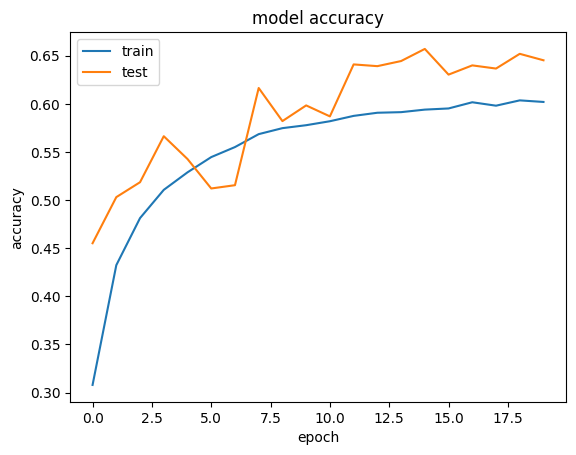

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'])

In [ ]:
model_1=Sequential()

model_1.add(Conv2D(filters=16,kernel_size=(3,3),input_shape=(32,32,3)))
model_1.add(BatchNormalization())
model_1.add(LeakyReLU(alpha=0.1))

model_1.add(Conv2D(filters=32,kernel_size=(3,3)))
model_1.add(BatchNormalization())
model_1.add(LeakyReLU(alpha=0.1))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.3))


model_1.add(Conv2D(filters=32,kernel_size=(3,3)))
model_1.add(BatchNormalization())
model_1.add(LeakyReLU(alpha=0.1))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.3))

model_1.add(Flatten())

model_1.add(Dense(256))
model_1.add(BatchNormalization())
model_1.add(LeakyReLU(alpha=0.1))
model_1.add(Dropout(0.5))

model_1.add(Dense(128))
model_1.add(BatchNormalization())
model_1.add(LeakyReLU(alpha=0.1))
model_1.add(Dropout(0.5))

model_1.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
model_1.compile(optimizer=Adamax(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history_1=model_1.fit(x_train,y_train,epochs=20,batch_size=64,validation_split=0.2,callbacks=[es],shuffle=True)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.2244 - loss: 2.3382 - val_accuracy: 0.4234 - val_loss: 1.6256
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3784 - loss: 1.7053 - val_accuracy: 0.4908 - val_loss: 1.4307
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4432 - loss: 1.5180 - val_accuracy: 0.5274 - val_loss: 1.3356
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4884 - loss: 1.4154 - val_accuracy: 0.5315 - val_loss: 1.3492
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5251 - loss: 1.3234 - val_accuracy: 0.5875 - val_loss: 1.1463
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5451 - loss: 1.2612 - val_accuracy: 0.5719 - val_loss: 1.1993
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5745 - loss: 1.1948 - val_accuracy: 0.6111 - val_loss: 1.0768
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5911 - loss: 1.1609 - val_accuracy: 0

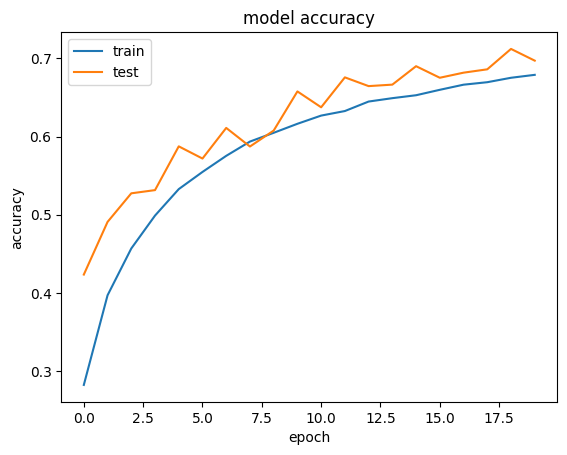

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'])

In [ ]:
y_pred=model_1.predict(x_test)

y_pred_index=np.argmax(y_pred,axis=1)

print(y_pred_index)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
[3 8 8 ... 5 4 7]


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [ ]:
print(y_pred_index)

[3 1 1 ... 5 1 7]


In [ ]:
cm=confusion_matrix(np.argmax(y_test,axis=1),y_pred_index)
print(cm)

[[639  10  51  20  38   5  16   8 169  44]
 [ 14 686   1   8   7   2  34   2  61 185]
 [ 54   3 402  55 190 101 149  20  15  11]
 [  7   0  25 466 105 200 145  15  27  10]
 [  9   1  14  48 793  12  85  19  18   1]
 [  4   0  13 160  88 653  49  18  13   2]
 [  2   0   8  34  35  11 901   3   6   0]
 [  8   0  14  36 161 100  26 638   9   8]
 [ 19  14   5   9  13   3  12   1 907  17]
 [ 17  20   3   7  15   7  18   3  50 860]]


In [ ]:
cr=classification_report(np.argmax(y_test,axis=1),y_pred_index)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.64      0.72      1000
           1       0.93      0.69      0.79      1000
           2       0.75      0.40      0.52      1000
           3       0.55      0.47      0.51      1000
           4       0.55      0.79      0.65      1000
           5       0.60      0.65      0.62      1000
           6       0.63      0.90      0.74      1000
           7       0.88      0.64      0.74      1000
           8       0.71      0.91      0.80      1000
           9       0.76      0.86      0.80      1000

    accuracy                           0.69     10000
   macro avg       0.72      0.69      0.69     10000
weighted avg       0.72      0.69      0.69     10000



Using Transfer Learning(vgg16) from keras

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
vgg_model=VGG16(weights='imagenet',include_top=False,input_shape=(32,32,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
model_1_1=Sequential()

model_1_1.add(vgg_model)

model_1_1.add(Flatten())

model_1_1.add(Dense(256))
model_1_1.add(BatchNormalization())
model_1_1.add(LeakyReLU(alpha=0.1))
model_1_1.add(Dropout(0.5))

model_1_1.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
#model compilation
model_1_1.compile(optimizer=Adamax(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history_1_1=model_1_1.fit(x_train,y_train,epochs=20,batch_size=64,validation_split=0.2,callbacks=[es],shuffle=True)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 64ms/step - accuracy: 0.2839 - loss: 1.9849 - val_accuracy: 0.4828 - val_loss: 1.3552
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 58ms/step - accuracy: 0.5811 - loss: 1.1361 - val_accuracy: 0.7010 - val_loss: 0.8568
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 58ms/step - accuracy: 0.7316 - loss: 0.7667 - val_accuracy: 0.6411 - val_loss: 1.0752
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 58ms/step - accuracy: 0.8030 - loss: 0.5860 - val_accuracy: 0.7440 - val_loss: 0.8406
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 58ms/step - accuracy: 0.8569 - loss: 0.4265 - val_accuracy: 0.8243 - val_loss: 0.5507
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 58ms/step - accuracy: 0.8945 - loss: 0.3177 - val_accuracy: 0.7711 - val_loss: 0.8139
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 58ms/step - accuracy: 0.9285 - loss: 0.2184 - val_accuracy: 0.8276 - val_loss: 0.5727
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 58ms/step - accuracy: 0.9507 - loss: 0.1521 - 

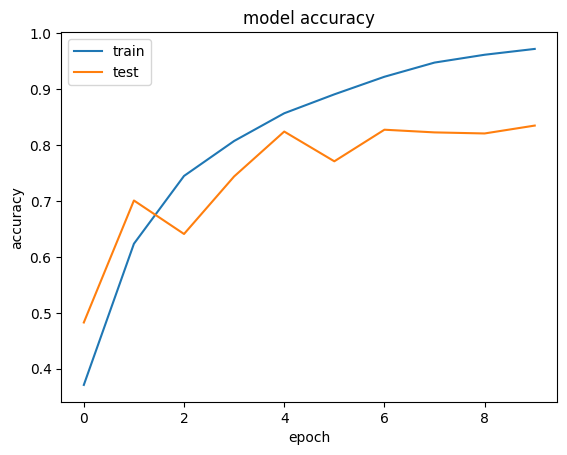

In [ ]:
#plotting the history
plt.plot(history_1_1.history['accuracy'])
plt.plot(history_1_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'])

In [ ]:
#prediction
y_pred_1_1=model_1_1.predict(x_test)

y_pred_index_1_1=np.argmax(y_pred_1_1,axis=1)

print(y_pred_index_1_1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
[3 8 8 ... 5 1 7]


In [ ]:
cifar10_labels = ["airplane", "automobile", "bird", "cat", "deer",
                  "dog", "frog", "horse", "ship", "truck"]
decoded_label=np.argmax(y_test,axis=1)

decoded_names=[cifar10_labels[i] for i in decoded_label]
print(decoded_label)
print(decoded_names)

[3 8 8 ... 5 1 7]
['cat', 'ship', 'ship', 'airplane', 'frog', 'frog', 'automobile', 'frog', 'cat', 'automobile', 'airplane', 'truck', 'dog', 'horse', 'truck', 'ship', 'dog', 'horse', 'ship', 'frog', 'horse', 'airplane', 'deer', 'truck', 'dog', 'bird', 'deer', 'airplane', 'truck', 'frog', 'frog', 'dog', 'deer', 'dog', 'truck', 'bird', 'deer', 'automobile', 'truck', 'dog', 'deer', 'frog', 'dog', 'frog', 'airplane', 'truck', 'cat', 'truck', 'horse', 'frog', 'truck', 'ship', 'airplane', 'cat', 'ship', 'ship', 'horse', 'horse', 'deer', 'frog', 'horse', 'cat', 'frog', 'cat', 'frog', 'bird', 'automobile', 'bird', 'cat', 'horse', 'bird', 'frog', 'ship', 'ship', 'airplane', 'bird', 'truck', 'cat', 'cat', 'ship', 'ship', 'automobile', 'automobile', 'horse', 'bird', 'dog', 'bird', 'horse', 'ship', 'truck', 'airplane', 'cat', 'ship', 'frog', 'deer', 'frog', 'frog', 'airplane', 'airplane', 'horse', 'deer', 'dog', 'frog', 'cat', 'automobile', 'automobile', 'cat', 'frog', 'ship', 'horse', 'deer', 'ai

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
cm=confusion_matrix(np.argmax(y_test,axis=1),y_pred_index_1_1)
cr=classification_report(np.argmax(y_test,axis=1),y_pred_index_1_1)
print(cr)
print(cm)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1000
           1       0.92      0.90      0.91      1000
           2       0.77      0.82      0.79      1000
           3       0.56      0.82      0.67      1000
           4       0.91      0.73      0.81      1000
           5       0.91      0.55      0.68      1000
           6       0.87      0.86      0.87      1000
           7       0.89      0.86      0.88      1000
           8       0.88      0.94      0.90      1000
           9       0.88      0.88      0.88      1000

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.83      0.83     10000

[[894   7  38   4   2   0   2   7  31  15]
 [ 17 904   0   2   0   0   4   0  31  42]
 [ 31   1 818  69  25   5  35   8   6   2]
 [ 16   4  46 819  14  29  30   8  17  17]
 [ 12   1  62  96 727  10  29  52   6   5]
 [  5   4  46 329  10 547 